###Blobs. A project of Urban CCD in Chicago
#Tutorial 1.0 - Using Static Data

##Data Prep and Set-Up
   You should have already cloned the blobs repo from GitHub, and saved it accordingly. The first steps import the required libraries, assign and initilize the required data and spatial files. Your data will be connected to spatial files, connecting 311 call data to census tracts in this case.

In [279]:
cd blobs

[Errno 2] No such file or directory: 'blobs'
/Users/laurendyson/Sites/blobs


In [280]:
# Import required libraries and assign root directory of blobs to root
import blobs
import numpy as np
import pandas as pd
import pysal as ps
import os

root = os.getcwd()
%pylab inline
SHAPE_FILE = root + '/virginia_tracts.shp'
DBF_FILE = root + '/virginia_tracts.dbf'
DATA_FILE = root + '/virginia_weighted.csv' # First column should be the unique geo_id
WEIGHT_FILE = root + '/virginia_tracts.gal' # Can be None
SHAPE_GEO_ID = 'GEO_ID'
DATA_GEO_ID = 'geo_id'

Populating the interactive namespace from numpy and matplotlib


In [281]:
# Open census tract shapefile and database.
shp_link = SHAPE_FILE
dbf = ps.open(DBF_FILE)

In [282]:
# Shapefile and data preparation.
cols = np.array([dbf.by_col(col) for col in dbf.header]).T
df = pd.DataFrame(cols)
df.columns = dbf.header
df['order'] = df.index

In [283]:
# Assign spatial weight for census tracts.
if WEIGHT_FILE:
    w=ps.open(WEIGHT_FILE).read()
else:
    w = ps.knnW_from_shapefile(SHAPE_FILE, idVariable=SHAPE_GEO_ID) #KNN vs. Rook
    

In [284]:
# Read in the data from the csv file

raw_data = pd.read_csv(DATA_FILE, dtype=object)
for c in raw_data.columns[1:]:
    raw_data[c] = raw_data[c].astype('float')

In [285]:
# Format data and merge on shapefile IDs

ordered_tracts = pd.DataFrame(df.loc[:,[SHAPE_GEO_ID, 'order']])
merged_data = pd.merge(raw_data, ordered_tracts, how='right', left_on=DATA_GEO_ID, 
    right_on= SHAPE_GEO_ID, sort=False).fillna(0).sort(['order'])
merged_data = merged_data.drop(['order', SHAPE_GEO_ID],1)

class bd:
  data = merged_data
  w = w
  shp_link = shp_link
  id = DATA_GEO_ID
  level = 'tract'

In [286]:
# Assign the attribute data.
d = bd()

##Create Blobs
You can assign what attribute you would like to "blob" accordingly. In example 1, blobs are created from census tracts and must have a minimum of 10,000 persons per blob.

In [287]:
merged_data['TOTPOP'].sum()

8001024.0

In [292]:
# Example 1: Create blobs minimum population of 10,000 in each blob. This calls a Pop-Up Window with the Map.
c = blobs.Blobs(d, 'TOTPOP', 600000, iterations=1, plot=False)

['VAP_PI', 'VAP_NA', 'TOTPOP_WNH', 'TOTPOP', 'TOTPOP_PI', 'VAP', 'TOTPOP_NA', 'VAP_WNH', 'VAP_H', 'TOTPOP_B', 'TOTPOP_A', 'VAP_A', 'VAP_B', 'TOTPOP_H', 'PRS08_REP_per', 'PRS08_DEM_per', 'GOV09_DEM_per', 'GOV09_REP_per']

### CREATING BLOBS FROM 18 VARIABLES ###
    PARAMETERS:
     # Minimum TOTPOP in each blob: 600000
     # Iterations: 1
     # Method: equal votes
     # Plot blobs: False
     # Save blobs data: False


# ITERATION 1                 
  Score: 25861.45
  Created 10 blobs (190 tracts per blob)
  Best solution so far: 25861.45
  Time taken: 1345.1 seconds (0 seconds remaining)

# BEST SOLUTION:                      
  Score: 25861.45
  10 blobs (190 tracts per blob)


In [297]:
x = c.regions

In [302]:
x = pd.DataFrame(x)

In [304]:
x.columns.values

array([0])

In [313]:
x.head()

,blob
0,7
1,7
2,4
3,0
4,2


In [312]:
x.rename(columns={0: 'blob'}, inplace=True)

In [314]:
x = pd.concat([merged_data, x], axis=1)

In [318]:
blob = x['TOTPOP'].groupby(x['blob']).sum()

In [319]:
blob

blob
0     969545
1     786050
2     621526
3     629331
4     807815
5    1394556
6     600098
7     655661
8     934478
9     601964
Name: TOTPOP, dtype: float64

In [303]:
x.to_csv('virginia_10distb_regions.csv')

  Plotting...


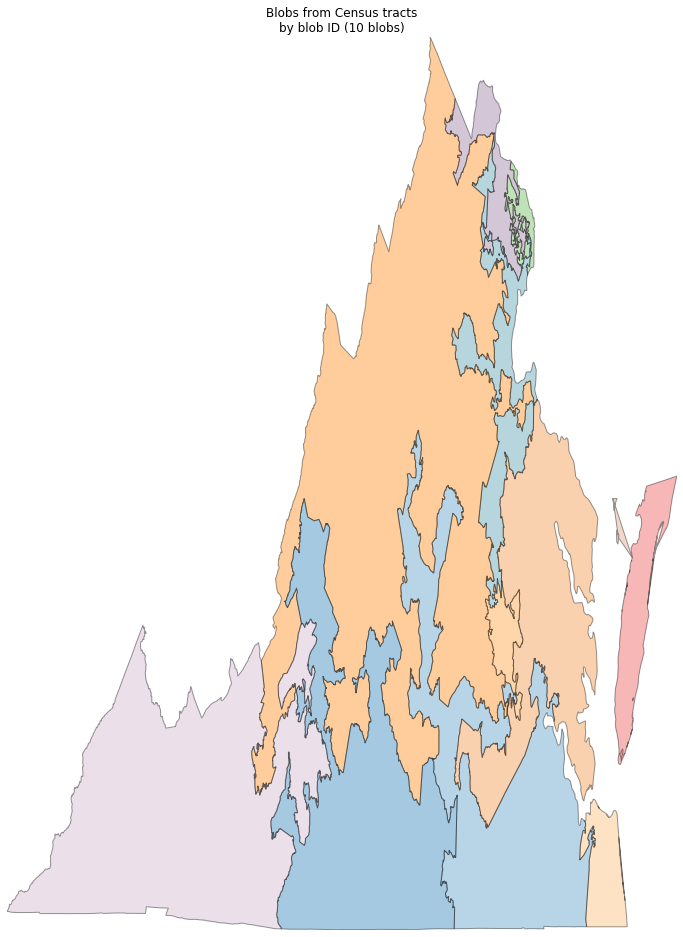

In [293]:
#output a shape file for the generated blobs. Visualize the blobs map
c.generate_shapefile(filename='virginia_10distsb.shp')
c.plot_blobs(blob_shp = 'virginia_10distsb.shp')

  Plotting...


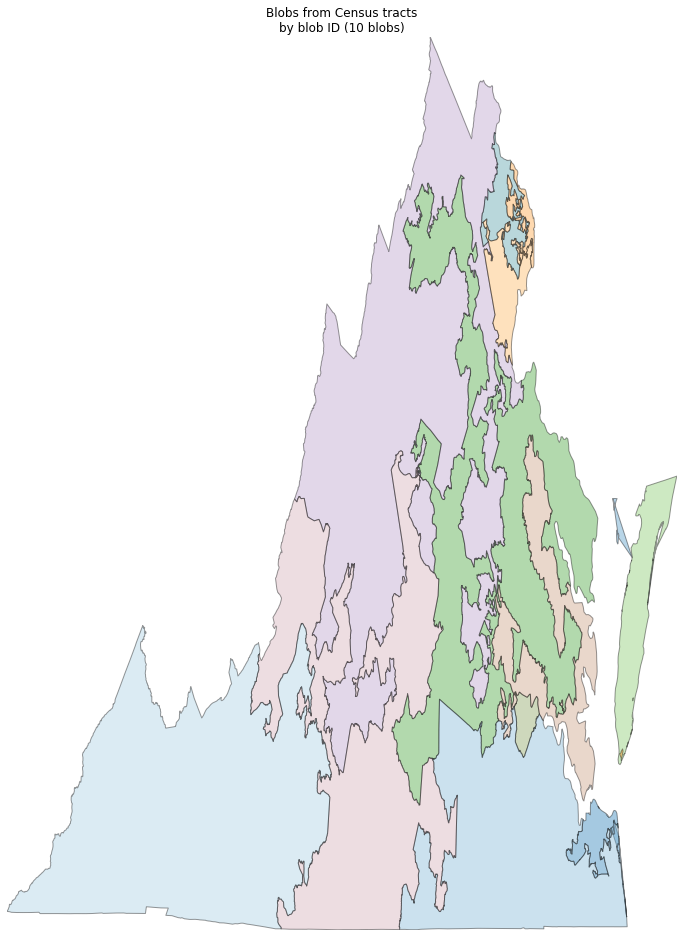

In [291]:
#output a shape file for the generated blobs. Visualize the blobs map
b.generate_shapefile(filename='virginia_10dists.shp')
b.plot_blobs(blob_shp = 'virginia_10dists.shp')